In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Read in the file here

In [2]:
spotify = pd.read_csv('Data/SpotifyFeatures0419.csv')

spotify.head(2)

artist_name                track_id  \
0          YG  2RM4jf1Xa9zPgMGRDiht8O   
1          YG  1tHDG53xJNGsItRA3vfVgs   

                                       track_name  acousticness  danceability  \
0  Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj       0.00582         0.743   
1                    BAND DRUM (feat. A$AP Rocky)       0.02440         0.846   

   duration_ms  energy  instrumentalness  key  liveness  loudness  mode  \
0       238373   0.339               0.0    1    0.0812    -7.678     1   
1       214800   0.557               0.0    8    0.2860    -7.259     1   

   speechiness    tempo  time_signature  valence  popularity  
0        0.409  203.927               4    0.118          15  
1        0.457  159.009               4    0.371           0

In [4]:
#spotify.info()

#### Restructuring the data

In [3]:
#order the data by the target column; drop the track_id and superfluous index column
spotify_ordered = spotify.sort_values('popularity', ascending=False).reset_index()
so = spotify_ordered.drop(['index', 'track_id'], axis=1)

#start index at 1 to accurately see where popularities rank
so.index = so.index + 1

#drop songs with popularity of zero as they create noise
so = so[so.popularity > 0]
so.tail()

artist_name                               track_name  acousticness  \
111770       Nikonem                            Lighter House         0.079   
111771   Preet Thind                             Punjab Singh         0.250   
111772    Jesper Kyd  Vermintide 2 Main Theme - Chaos Version         0.126   
111773  Onkarswaroop          Godi Madhachi(Sapan Bhurr Zhal)         0.408   
111774      Toy Rock                                  The End         0.987   

        danceability  duration_ms  energy  instrumentalness  key  liveness  \
111770         0.764       124672  0.1950          0.898000    5    0.1210   
111771         0.713       271000  0.9140          0.000311   11    0.9430   
111772         0.424       237817  0.4070          0.902000    5    0.0941   
111773         0.662       289216  0.4920          0.014800    8    0.1040   
111774         0.421       102545  0.0318          0.807000    0    0.1130   

        loudness  mode  speechiness    tempo  time_signature  valence  \
111770   -19.130     0       0.0842  119.990               4   0.7590   
111771    -2.462     0       0.2200  168.011               4   0.8960   
111772   -13.841     1       0.0646  144.027               3   0.1820   
111773    -9.850     0       0.1140  131.906               3   0.3660   
111774   -36.149     1       0.0478  102.798               3   0.0391   

        popularity  
111770           1  
111771           1  
111772           1  
111773           1  
111774           1

In [4]:
#convert certain columns to categorical as they shouldn't 
#be treated numerically or ordinally
so[['mode', 'key', 'time_signature']] = so[['mode', 'key', 'time_signature']].astype('category')

In [5]:
so.head()

artist_name                                     track_name  \
1    Daddy Yankee                                      Con Calma   
2     Post Malone                                           Wow.   
3   Billie Eilish                                        bad guy   
4     Post Malone  Sunflower - Spider-Man: Into the Spider-Verse   
5  Jonas Brothers                                         Sucker   

   acousticness  danceability  duration_ms  energy  instrumentalness key  \
1        0.1100         0.737       193227   0.860          0.000002   8   
2        0.1630         0.833       149520   0.539          0.000002  11   
3        0.3080         0.708       194088   0.418          0.093000   0   
4        0.5200         0.744       158040   0.494          0.000000   2   
5        0.0427         0.842       181040   0.734          0.000000   1   

   liveness  loudness mode  speechiness    tempo time_signature  valence  \
1    0.0574    -2.652    0       0.0593   93.989              4    0.656   
2    0.1010    -7.399    0       0.1780   99.947              4    0.385   
3    0.1000   -10.998    1       0.3680  131.926              4    0.578   
4    0.0716    -5.563    1       0.0699   89.972              4    0.927   
5    0.1060    -5.065    0       0.0588  137.958              4    0.952   

   popularity  
1         100  
2          98  
3          98  
4          98  
5          98

In [24]:
#print(so.dtypes)

In [6]:
#Create new table with a column classifying popularity ratings
classified = so.copy()
classified['pop_rating'] = ''

for i, row in classified.iterrows():
    score = 'unpopular'
    if (row.popularity > 50) & (row.popularity < 75):
        score = 'medium'
    elif row.popularity >= 75:
        score = 'popular'
    classified.at[i, 'pop_rating'] = score
    
classified.head()

artist_name                                     track_name  \
1    Daddy Yankee                                      Con Calma   
2     Post Malone                                           Wow.   
3   Billie Eilish                                        bad guy   
4     Post Malone  Sunflower - Spider-Man: Into the Spider-Verse   
5  Jonas Brothers                                         Sucker   

   acousticness  danceability  duration_ms  energy  instrumentalness key  \
1        0.1100         0.737       193227   0.860          0.000002   8   
2        0.1630         0.833       149520   0.539          0.000002  11   
3        0.3080         0.708       194088   0.418          0.093000   0   
4        0.5200         0.744       158040   0.494          0.000000   2   
5        0.0427         0.842       181040   0.734          0.000000   1   

   liveness  loudness mode  speechiness    tempo time_signature  valence  \
1    0.0574    -2.652    0       0.0593   93.989              4    0.656   
2    0.1010    -7.399    0       0.1780   99.947              4    0.385   
3    0.1000   -10.998    1       0.3680  131.926              4    0.578   
4    0.0716    -5.563    1       0.0699   89.972              4    0.927   
5    0.1060    -5.065    0       0.0588  137.958              4    0.952   

   popularity pop_rating  
1         100    popular  
2          98    popular  
3          98    popular  
4          98    popular  
5          98    popular

In [7]:
#Set up the data for encoding: 'track_name' is categorical but is not useful so it will be dropped
encoded = so.drop('track_name', axis=1)

encoded = pd.get_dummies(encoded)

In [8]:
encoded.shape

(111774, 29833)

Now there are three separate dataframes to experiment with:<br>
so: The basic data ordered by popularity<br>
classified: The data with an added classifier target variable<br>
encoded: Dataframe where the catagorical variables have been transformed

In [9]:
#experiment with a basic decision tree on the classified data

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#drop all non-numeric columns, also the target variable
X_tree = classified.drop\
(['artist_name', 'track_name', 'key', 'mode', 'time_signature', 'popularity', 'pop_rating'], axis=1)
y_tree = classified.pop_rating

dt = DecisionTreeClassifier(max_depth=20, random_state=7)

X_tr, X_tst, y_tr, y_tst = train_test_split(X_tree, y_tree, test_size=0.3, random_state=5)

dt.fit(X_tr, y_tr)

y_pred = dt.predict(X_tst)
y_pred[:5]

array(['unpopular', 'unpopular', 'unpopular', 'medium', 'medium'],
      dtype=object)

In [10]:
accuracy_score(y_pred, y_tst)

0.7874034533146452

In [11]:
#Try a regressor tree

from sklearn.tree import DecisionTreeRegressor

X_rg = so.drop\
(['artist_name', 'track_name', 'key', 'mode', 'time_signature', 'popularity'], axis=1)
y_rg = so.popularity

X_train, X_test, y_train, y_test = train_test_split(X_rg, y_rg, test_size=0.3, random_state=12)

dt_reg = DecisionTreeRegressor() #try unrestrained

dt_reg.fit(X_train, y_train)

rg_pred = dt_reg.predict(X_test)
rg_pred[:3]

array([18., 48.,  9.])

In [12]:
dt_reg.score(X_test, y_test)

-0.7075933761580357

##### Bagging

In [13]:
from sklearn.ensemble import BaggingClassifier

#splt from previous classifier
dt = DecisionTreeClassifier(max_depth=20, random_state=18)
bc = BaggingClassifier(base_estimator=dt, n_estimators=100, random_state=1)

bc.fit(X_tr, y_tr)

bc_pred = bc.predict(X_tst)

accuracy_score(bc_pred, y_tst)

0.8583783138997405

##### Random Forest

In [14]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=1)

rf.fit(X_tr, y_tr)

rf_pred = rf.predict(X_tst)

accuracy_score(rf_pred, y_tst)

0.8593922404795277

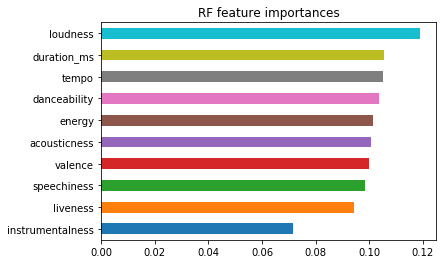

In [15]:
important = pd.Series(data=rf.feature_importances_, index=X_tr.columns).sort_values()

_ = important.plot(kind='barh')
_ = plt.title('RF feature importances')

It seems surprising at first that duration is such an impactful feature but, after thinking about it, it kind of makes sense. Popular songs do tend to consistently measure around the 3 to 4 minute mark. A 10 minute song isn't exactly 'radio-friendly', and shorter songs are likely easier for the casual listener to digest.<br>
<br>
But, on the whole, there isn't a huge differentiation between features.

###### sklearn knn test
<br>
This was just something I tried in order to practice new material. I now know that this is a classification model, and not suited for what I was trying to accomplish.

In [5]:
'''from sklearn.neighbors import KNeighborsClassifier

X = spotify[['acousticness', 'danceability', 'energy', 'speechiness']].head()
y = spotify.popularity.head()

X_new = spotify[['acousticness', 'danceability', 'energy', 'speechiness']].iloc[6:11, :]

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X,y)
'''

"from sklearn.neighbors import KNeighborsClassifier\n\nX = spotify[['acousticness', 'danceability', 'energy', 'speechiness']].head()\ny = spotify.popularity.head()\n\nX_new = spotify[['acousticness', 'danceability', 'energy', 'speechiness']].iloc[6:11, :]\n\nknn = KNeighborsClassifier(n_neighbors=5)\nknn.fit(X,y)\n"

In [6]:
#knn.predict(X_new)

<b>Investigating correlations in the spotify data</b>

In [ ]:
#spotify.corr()

In [7]:
import seaborn as sns

#sns.heatmap(spotify.corr(), square=True, cmap='RdYlGn')

Here's a rudimentary attempt at a linear regression model. This is just for practice and includes a few arbitrary columns.

In [5]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import cross_val_score, train_test_split

#pick a few independent variables, and set the dependent variable
X = spotify[['acousticness', 'danceability', 'energy', 'liveness', 'loudness', 'speechiness']]
y = spotify.popularity

#fit and predict the model
lm = LinearRegression()
lm.fit(X,y)
lm.predict(X)[:2]

array([29.37066237, 26.99189831])

In [5]:
lm.score(X,y)

0.07074781553598763

The score for this model is pretty poor. Let's adjust the data and try again.

In [37]:
#re-run model for songs with pop greater than 0
over_zero = spotify[spotify['popularity'] > 0]
X = over_zero[['acousticness', 'danceability', 'energy', 'liveness', 'loudness', 'speechiness']]
y = over_zero.popularity

#fit and predict the model
lm = LinearRegression()
lm.fit(X,y)
prediction = lm.predict(X)
prediction[:2]

array([33.97605744, 31.54745617])

In [7]:
actual_pop = zip(y, prediction)
actual_100 = list(actual_pop)[:100]
actual_100[:3]

[(15, 33.97605743948594), (56, 31.547456165179973), (28, 34.11614314699749)]

In [9]:
diffs = {'Under 5': 0, '5 and 10': 0, 'Over ten': 0}
for pair in actual_100:
    if abs(pair[0] - pair[1]) < 5:
        diffs['Under 5'] += 1
    elif 5 <= abs(pair[0] - pair[1]) < 10:
        diffs['5 and 10'] += 1
    else:
        diffs['Over ten'] += 1
            
diffs

{'Under 5': 14, '5 and 10': 34, 'Over ten': 52}

The score is slightly improved

In [38]:
lm.score(X,y)

0.09051830632081626

### <b>pd.get_dummies</b>
<br>
Restructuring the model to account for categorical data.

In [22]:
#Set up the data for encoding: 'track_name' is categorical but is not useful so it will be dropped
encoded = so.drop('track_name', axis=1)

#Now, drop songs with popularity of zero as they create noise
encoded = encoded[encoded['popularity'] > 0]

encoded = pd.get_dummies(encoded)

In [10]:
encoded.shape

(111774, 29817)

In [57]:
%%time
encoded_samp = encoded.sample(n=20000, replace=True)

X = encoded_samp.drop('popularity', axis=1)
y = encoded_samp.popularity

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lm = LinearRegression()
lm.fit(X_train,y_train)

Wall time: 16min 13s


In [35]:
lm.score(X_test, y_test)

ValueError: shapes (33533,11) and (6,) not aligned: 11 (dim 1) != 6 (dim 0)

Predict over 10,000 rows and create custom measurement to assess model:

In [55]:
encoded_samp = encoded.sample(n=10000, replace=True)

X = encoded_samp.drop('popularity', axis=1)
y = encoded_samp.popularity

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lin = LinearRegression()
lin.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [56]:
lin.score(X_test, y_test)

-2408713961.623535

In [57]:
prd = lin.predict(X_test)

In [58]:
def custom_loss(prediction, actual):
    paired = zip(prediction, actual)
    listed = list(paired)
    diffs = {'Under 5': 0, '5 and 10': 0, 'Over ten': 0}

    for pair in listed:
        if abs(pair[0] - pair[1]) < 5:
            diffs['Under 5'] += 1
        elif 5 <= abs(pair[0] - pair[1]) < 10:
            diffs['5 and 10'] += 1
        else:
            diffs['Over ten'] += 1
     
    return diffs

print(custom_loss(prd, y_test))

{'Under 5': 743, '5 and 10': 348, 'Over ten': 1909}


In [60]:
print(len(prd), len(y_test))

3000 3000


In [62]:
#percentages of encoded "successes"
x = (743 + 348) / 3000

x

0.3636666666666667

In [81]:
'''Retry model without the encoded categoricals'''
X = over_zero.drop(['artist_name', 'track_id', 'track_name', 'key', 'mode', 'time_signature', 'popularity'], axis=1)
y = over_zero.popularity

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lreg = LinearRegression()
lreg.fit(X_train,y_train)
pred = lreg.predict(X_test)

print(custom_loss(pred, y_test))

{'Under 5': 7044, '5 and 10': 6567, 'Over ten': 19922}


In [82]:
#X_test.columns

In [83]:
print(lreg.score(X_test, y_test))

0.10150833268129189


This model has a perfect score? That doesn't seem right.
<br>
Okay, nevermind. Once I removed the popularity info from the X variable, the results are more as expected. However, the results are improved over the large dataset with the encoded categorical data. Perhaps that's because the error is less amplified.

In [113]:
#Check which coefficients are best
coeffs = pd.concat([pd.DataFrame(X.columns), pd.DataFrame(lin.coef_)], axis=1)
coeffs.columns = ['Feature', 'Value']
coeffs = coeffs.sort_values('Value', ascending=False)
coeffs.reset_index(inplace=True)
coeffs.drop('index', axis=1).head()

Feature         Value
0  artist_name_10cellphones  1.314179e+07
1          artist_name_1991  1.265387e+07
2         artist_name_.Sinh  1.255652e+07
3           artist_name_169  1.220318e+07
4       artist_name_10시 45분  1.212567e+07

Fit linear model over batches:

In [13]:
#batching
def batch_score(dt, size):
    scores = []
    for i in range(10):
        sample = dt.sample(n=size, replace=True)
    
        X = sample.drop('popularity', axis=1)
        y = sample.popularity
    
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
        reg = LinearRegression()
        reg.fit(X_train, y_train)
    
        scores.append(reg.score(X_test, y_test))
    return scores

print(np.median(batch_score(encoded, 10000)))

-13227041927.4118


<b>A basic ridge model without hyperparameter tuning:</b>

In [84]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

X_r = encoded_samp.drop(['key', 'mode', 'time_signature', 'popularity'], axis=1)
y_r = encoded_samp.popularity

X_tr, X_ts, y_tr, y_ts = train_test_split(X_r, y_r, test_size=0.3, random_state=5)

ridge = Ridge(alpha = 0.5, normalize=True)
ridge.fit(X_tr, y_tr)

ridge.score(X_ts, y_ts)

0.37031368610273585

In [85]:
#Custom loss function results
pred_rdg = ridge.predict(X_ts)

print(custom_loss(pred_rdg, y_ts))

{'Under 5': 857, '5 and 10': 766, 'Over ten': 1377}


The ridge model above is definitely an imporvement over the basic linear model using the encoded data.

In [86]:
from sklearn.model_selection import cross_val_score

cv_res = cross_val_score(ridge, X_r, y_r, cv=5)
cv_res

array([0.33664579, 0.37208867, 0.36208081, 0.37075286, 0.3600336 ])

In [87]:
from sklearn.linear_model import Lasso

names = encoded_samp.drop(['key', 'mode', 'time_signature', 'popularity'], axis=1).columns

lasso = Lasso(alpha=0.1)

lasso_coefs = lasso.fit(X_r, y_r).coef_

coef_vals = list(zip(names, (list(lasso_coefs))))

print([pair for pair in coef_vals if abs(pair[1]) > 0])

[('danceability', 3.674463814521797), ('duration_ms', -5.283404880110184e-06), ('energy', -5.274845775246764), ('instrumentalness', -2.7622622706569127), ('liveness', -0.31321412831521195), ('loudness', 0.7647827269606422), ('tempo', 0.0005529130737982571), ('valence', -3.0495937539124607), ('artist_name_Armin van Buuren', -4.953100136536324), ('artist_name_Johann Sebastian Bach', -6.754373020036663), ('artist_name_Wolfgang Amadeus Mozart', -2.6045918012716758)]


In [88]:
Xl_train, Xl_test, yl_train, yl_test = train_test_split(X_r, y_r, test_size=0.3, random_state=21)

lasso.fit(Xl_train, yl_train)
lasso.score(Xl_test, yl_test)

0.10004708870208734

In [89]:
lasso_pred = lasso.predict(Xl_test)
print(custom_loss(lasso_pred, yl_test))

{'Under 5': 625, '5 and 10': 586, 'Over ten': 1789}


The ridge regression model seems to perform better than the others.

## Popular songs to total songs ratio

Using a histogram and playing around with the binning parameter, I came across an interesting feature of the data: the frequency of song popularities seem to spike in intervals of 25. This is a curious characteristic worth exploring later, but for now I want to focus on the last spike around the 75 mark. I can use this group to explore what is popular, in this case anything with a score of at least 75, and find all artists with at least one song that fits that criteria.

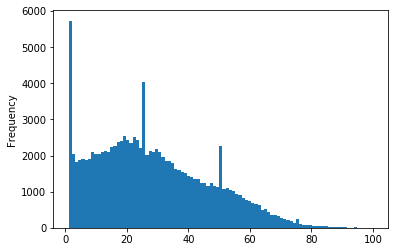

In [15]:
over_0 = so[so['popularity'] > 0]

_ = over_0['popularity'].plot(kind='hist', bins=95)

In [16]:
#Subset the data for only songs with popularity over 75 and count the number of tracks each artist had
#fitting this criteria. This will give a total count of 'popular' songs for each artist.
pop_artists = so[so['popularity'] > 75].groupby('artist_name').count().sort_values('track_name', ascending=False)
pop_artists = pop_artists.iloc[:,:1].sort_index()
pop_artists.columns = ['total_pop_tracks']
pop_artists.head(3)

total_pop_tracks
artist_name                  
(G)I-DLE                    1
2 Chainz                    3
21 Savage                   4

Now, create a new dataframe with all the songs, not just the popular songs, from all the artists that have at least one popular song. This will allow us to compare the number of popular songs to the total number of songs.

In [17]:
x = list(pop_artists.index)

pop_full_catalog = pd.DataFrame()
for name in x:
    pop_full_catalog = pop_full_catalog.append(so[so['artist_name'] == name])
    
pop_full_catalog.head(3)

artist_name    track_name  acousticness  danceability  duration_ms  \
580     (G)I-DLE      Senorita       0.01590         0.782       197616   
1285    (G)I-DLE        LATATA       0.00427         0.774       202773   
1493    (G)I-DLE  HANN (Alone)       0.05900         0.709       205820   

      energy  instrumentalness  key  liveness  loudness  mode  speechiness  \
580    0.808          0.000042    0     0.331    -3.139     1       0.0362   
1285   0.792          0.000001    9     0.283    -4.019     0       0.2240   
1493   0.718          0.000000    6     0.167    -3.315     0       0.0312   

        tempo  time_signature  valence  popularity  
580   120.021               4    0.420          78  
1285   98.100               4    0.505          73  
1493  104.971               4    0.240          72

Count the total number of tracks for each popular artist.

In [18]:
pop_total_count = pop_full_catalog.groupby('artist_name').count().sort_values('track_name', ascending=False)
pop_total_count = pop_total_count.iloc[:,:1].sort_index()
pop_total_count.columns = ['total_tracks']
pop_total_count.head(3)

total_tracks
artist_name              
(G)I-DLE               12
2 Chainz               23
21 Savage              16

Compute the ratio for popular tracks compared to total tracks. Create a new dataframe to show this info.

In [19]:
compare = pd.concat([pop_artists, pop_total_count], axis=1)
compare['popular_ratio'] = compare.total_pop_tracks / compare.total_tracks
compare = compare.sort_values('total_pop_tracks', ascending=False)
compare.head(10)

total_pop_tracks  total_tracks  popular_ratio
artist_name                                                 
Khalid                       24            38       0.631579
Juice WRLD                   23            44       0.522727
Ariana Grande                19            34       0.558824
Post Malone                  18            30       0.600000
Billie Eilish                17            22       0.772727
Bad Bunny                    14            23       0.608696
Ozuna                        12            30       0.400000
6ix9ine                      11            32       0.343750
XXXTENTACION                 10            35       0.285714
Travis Scott                  8            19       0.421053

In [20]:
compare.describe()

total_pop_tracks  total_tracks  popular_ratio
count        375.000000    375.000000     375.000000
mean           2.285333     14.997333       0.281543
std            2.757813     12.868628       0.277016
min            1.000000      1.000000       0.017857
25%            1.000000      4.000000       0.085145
50%            1.000000     12.000000       0.172414
75%            3.000000     22.000000       0.338542
max           24.000000     75.000000       1.000000

In [21]:
compare[compare['total_pop_tracks'] == 1].sort_values('total_tracks', ascending=False)

total_pop_tracks  total_tracks  popular_ratio
artist_name                                                       
Mike Posner                         1            56       0.017857
R3HAB                               1            54       0.018519
EXO                                 1            43       0.023256
Wiz Khalifa                         1            41       0.024390
TWICE                               1            41       0.024390
Shoreline Mafia                     1            40       0.025000
Gunna                               1            40       0.025000
iKON                                1            38       0.026316
Tyler, The Creator                  1            38       0.026316
Comethazine                         1            35       0.028571
Stray Kids                          1            34       0.029412
Russ                                1            33       0.030303
Alessia Cara                        1            32       0.031250
Tiësto                              1            32       0.031250
Rudimental                          1            32       0.031250
John Legend                         1            30       0.033333
BlocBoy JB                          1            30       0.033333
Lil Xan                             1            29       0.034483
Jon Z                               1            29       0.034483
Years & Years                       1            29       0.034483
Galantis                            1            28       0.035714
YUNGBLUD                            1            27       0.037037
ZAYN                                1            27       0.037037
Thomas Rhett                        1            26       0.038462
James Bay                           1            25       0.040000
Famous Dex                          1            24       0.041667
KYLE                                1            24       0.041667
Meek Mill                           1            22       0.045455
Gucci Mane                          1            21       0.047619
Brett Young                         1            20       0.050000
...                               ...           ...            ...
Shakira                             1             2       0.500000
Lil Uzi Vert                        1             2       0.500000
Rombai                              1             1       1.000000
MC L da Vinte                       1             1       1.000000
XO Cupid                            1             1       1.000000
Yo Gotti                            1             1       1.000000
Nightcall                           1             1       1.000000
Jubel                               1             1       1.000000
Jubël                               1             1       1.000000
K/DA                                1             1       1.000000
KIAN                                1             1       1.000000
PDL                                 1             1       1.000000
Hwa Sa                              1             1       1.000000
The Black Keys                      1             1       1.000000
EVERGLOW                            1             1       1.000000
Lil Dicky                           1             1       1.000000
Melim                               1             1       1.000000
Ansel Elgort                        1             1       1.000000
Andy Grammer                        1             1       1.000000
Westlife                            1             1       1.000000
Giant Rooks                         1             1       1.000000
Guaynaa                             1             1       1.000000
Tame Impala                         1             1       1.000000
Don Patricio                        1             1       1.000000
David Rees                          1             1       1.000000
Louis Tomlinson                     1             1       1.000000
I Belong to the Zoo                 1             1       1.000000
D

<b>Observations:</b>
<br>
-Looking at the previous few cells, there seems to be a good bit of variability among total tracks for popular artists, ranging between 1 and 75. The ratio of popular tracks to total tracks also varies widely. <br>
-There are quite a few artists with a ratio of 100%. <br>
-The artist with the most popular tracks tend to have fairly high ratios, perhaps reinforcing the idea that the best indicator of creating a new hit song is to already have an old hit song.

<b>Plot the data to look for correlations.</b>

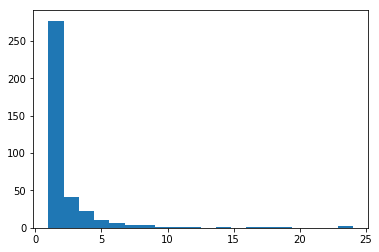

In [22]:
_ = plt.hist(compare.total_pop_tracks, bins=20)

Text(0, 0.5, 'Popular ratio')

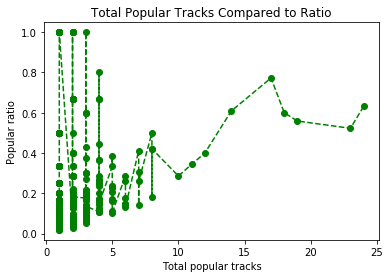

In [23]:
x = compare.total_pop_tracks
y = compare.popular_ratio

plt.plot(x, y, 'go--')
plt.title('Total Popular Tracks Compared to Ratio')
plt.xlabel('Total popular tracks')
plt.ylabel('Popular ratio')

Text(0, 0.5, 'Popular ratio')

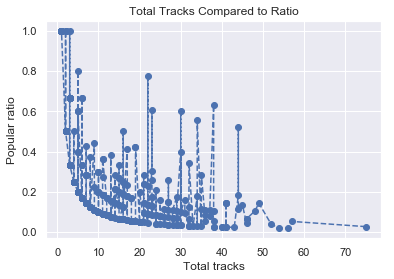

In [28]:
re_compare = compare.sort_values('total_tracks', ascending=False)
xx = re_compare.total_tracks
yy = re_compare.popular_ratio

plt.plot(xx, yy, 'bo--')
plt.title('Total Tracks Compared to Ratio')
plt.xlabel('Total tracks')
plt.ylabel('Popular ratio')

Comparing the charts above, having more total tracks tends to lead to a lower popular ratio, while those artists with more total popular songs tend to have a higher popular ratio despite having to put out more total tracks in order to score more 'hits'.

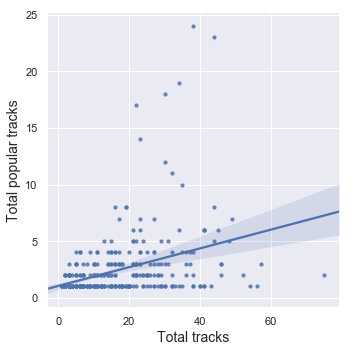

In [29]:
sns.set()
_ = sns.lmplot(x='total_tracks', y='total_pop_tracks', data=compare, scatter_kws={"s": 10})
_ = plt.xlabel('Total tracks', fontsize=14)
_ = plt.ylabel('Total popular tracks', fontsize=14)

### K-Means

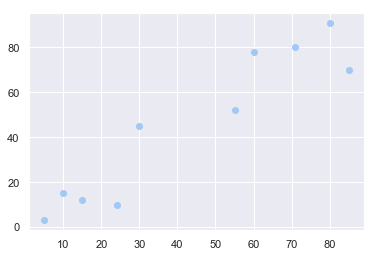

In [45]:
from sklearn.cluster import KMeans

X = np.array([[5,3],  
     [10,15],
     [15,12],
     [24,10],
     [30,45],
     [85,70],
     [71,80],
     [60,78],
     [55,52],
     [80,91],])

_ = plt.scatter(X[:,0],X[:,1], label='True Position')  

In [46]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
print(kmeans.cluster_centers_)

[[70.2 74.2]
 [16.8 17. ]]


In [47]:
kmeans.labels_

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

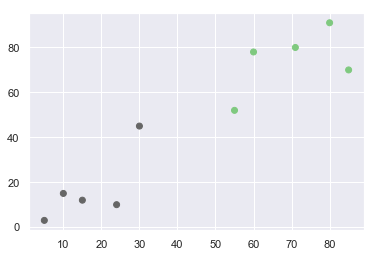

In [55]:
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap='Accent')

Now try it with the popularity target variable with songs that have popularity over zero. Start with three clusters.

In [34]:
X = np.array(over_zero.popularity).reshape(-1,1)

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

kmeans.cluster_centers_

array([[11.12525362],
       [55.72517549],
       [31.40629944]])

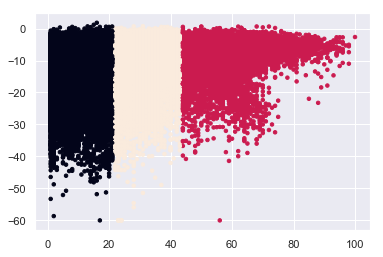

In [35]:
plt.scatter(X, over_zero.loudness, c=kmeans.labels_, s=12)

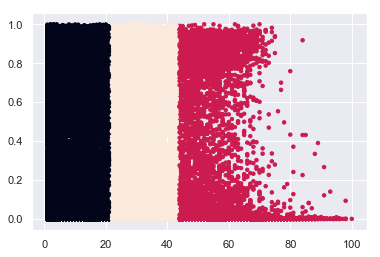

In [36]:
plt.scatter(X, over_zero.instrumentalness, c=kmeans.labels_, s=12)

Increasing the interations doesn't change anything.

In [39]:
X = np.array(over_zero.popularity).reshape(-1,1)

kmeans = KMeans(n_clusters=3, max_iter=600)
kmeans.fit(X)

kmeans.cluster_centers_

array([[55.72517549],
       [11.12525362],
       [31.40629944]])

Now try with more clusters to raise the bar for what qualifies as popular.

In [38]:
X = np.array(over_zero.popularity).reshape(-1,1)

kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

kmeans.cluster_centers_

array([[65.59952284],
       [19.06437498],
       [48.43151798],
       [ 6.20507582],
       [32.50901796]])

#### Explore the target column: popularity

In [ ]:
spotify['popularity'].describe()

In [21]:
#order the data by the target column; drop the track_id and superfluous index column
spotify_ordered = spotify.sort_values('popularity', ascending=False).reset_index()
so = spotify_ordered.drop(['index', 'track_id'], axis=1)

#start index at 1 to accurately see where popularities rank
so.index = so.index + 1
so.head(9)

artist_name                                     track_name  \
1    Daddy Yankee                                      Con Calma   
2     Post Malone                                           Wow.   
3   Billie Eilish                                        bad guy   
4     Post Malone  Sunflower - Spider-Man: Into the Spider-Verse   
5  Jonas Brothers                                         Sucker   
6   Ariana Grande       break up with your girlfriend, i'm bored   
7       Sam Smith         Dancing With A Stranger (with Normani)   
8       Lady Gaga                                        Shallow   
9   Ariana Grande                                        7 rings   

   acousticness  danceability  duration_ms  energy  instrumentalness  key  \
1        0.1100         0.737       193227   0.860          0.000002    8   
2        0.1630         0.833       149520   0.539          0.000002   11   
3        0.3080         0.708       194088   0.418          0.093000    0   
4        0.5200         0.744       158040   0.494          0.000000    2   
5        0.0427         0.842       181040   0.734          0.000000    1   
6        0.0421         0.726       190440   0.554          0.000000    5   
7        0.4500         0.741       171030   0.520          0.000002    8   
8        0.3710         0.572       215733   0.385          0.000000    7   
9        0.5780         0.725       178640   0.321          0.000000    1   

   liveness  loudness  mode  speechiness    tempo  time_signature  valence  \
1    0.0574    -2.652     0       0.0593   93.989               4    0.656   
2    0.1010    -7.399     0       0.1780   99.947               4    0.385   
3    0.1000   -10.998     1       0.3680  131.926               4    0.578   
4    0.0716    -5.563     1       0.0699   89.972               4    0.927   
5    0.1060    -5.065     0       0.0588  137.958               4    0.952   
6    0.1060    -5.290     0       0.0917  169.999               4    0.335   
7    0.2220    -7.513     1       0.0656  102.998               4    0.347   
8    0.2310    -6.362     1       0.0308   95.799               4    0.323   
9    0.0884   -10.744     0       0.3230   70.142               4    0.319   

   popularity  
1         100  
2          98  
3          98  
4          98  
5          98  
6          97  
7          96  
8          96  
9          96

We know that the median popularity score is 38. Let's see where other popularities fall on the scale.

In [ ]:
#how many songs equal the median popularity?
len(so[so['popularity'] == 38])

#What does this mean

What is the most frequent popularity score?

In [ ]:
so[['popularity']].mode()

In [ ]:
len(so[so['popularity'] == 0])

In [ ]:
#Where do songs with a 'middle' popularity score of 50 fall on the scale?
#There appears to be about 16k songs rated higher than 50
so[so['popularity'] == 50]

In [ ]:
so[so['popularity'] >= 90]

In [ ]:
so['popularity'].plot(kind='hist', bins=50)

In [ ]:
#find z-score for high popularity
pop = so['popularity']

z_of_90 = (90 - pop.mean()) / pop.std()
z_of_90

In [ ]:
low_pop = so[so['popularity'] <= 10]
len(low_pop)

In [ ]:
#percentage of songs with popularity at or below 10
(len(low_pop) / len(so)) * 100

The last few outputs demonstrate how rare songs are with high popularity ratings, and that a large portion of songs -- over 30% -- are virtually irrelevant. In fact, a score of 0 is by far the most frequent. 

This illustrates the problem that popularity may not have a formula. I need to find a way to come to terms with the fact that a large part of the equation comes down to marketing and cultural factors. It might be beneficial to drop all rows with a popularity rating of 0 because, even if they have the exact same characteristics as popular songs, they may simply not be popular due to factors outside the scope of this analysis.

#### Exploring and visualizing correlations

In [ ]:
#which artists occur the most?
so[['track_name', 'artist_name']].groupby('artist_name').count().sort_values('track_name', ascending=False)

Just some plot experiments below:

In [ ]:
so[so['popularity'] > 25].plot(kind='scatter', x='danceability', y='popularity', ylim=[15,100])

plt.show()

In [ ]:
so[so['popularity'] > 50].plot(kind='scatter', x='energy', y='popularity', ylim=[40,100], s=2)

plt.show()

In [ ]:
import seaborn as sns

sns.lmplot(x='energy', y='popularity', hue='mode', palette="Accent", scatter_kws={"s": 1}, data=so)
plt.show()

In [ ]:
above_70 = so[so['popularity'] > 70]

#compare with instrumentalness
sns.lmplot(x='instrumentalness', y='popularity', data=above_70, scatter_kws={"s": 10})

In [ ]:
#compare with liveness
sns.lmplot(x='liveness', y='popularity', data=above_70, scatter_kws={"s": 10})

In [ ]:
#compare with speechiness
sns.lmplot(x='speechiness', y='popularity', data=so, scatter_kws={"s": 1})

In [ ]:
#Attempt to make subplots: tempo vs. danceability
fig, axs = plt.subplots(ncols=2, sharex=False)
sns.regplot(x='tempo', y='popularity', data=above_70, scatter_kws={"s": 5}, ax=axs[0])
x = sns.regplot(x='danceability', y='popularity', data=above_70, scatter_kws={"s": 5}, ax=axs[1])
x.set(xlim=(0,1), ylim=(69,102))

Attemp at feature selection:

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
    
X_reg = so.iloc[:, [2,3,4,5,6,11,12]]
y_reg = so.loc[:, 'popularity']
X_new = SelectKBest(chi2, k=5).fit_transform(X_reg, y_reg)

pd.DataFrame(X_new)

#### Missing values

In [ ]:
so.info()

There appears to no null values, but for the sake of practice a few more tests are below:

In [ ]:
so.all()

In [ ]:
so.any()

In [ ]:
so[so.isnull()].count()

Now let's do some basic exploration of the dataset

In [ ]:
#What is the shape?
spotify.shape

In [ ]:
#Examine the first few rows
spotify.head()

In [ ]:
#Examine the tail
spotify.tail()

In [ ]:
#gather some basic statistical info
spotify.describe()

In [ ]:
#Narrow the focus to a couple key columns
spotify[['danceability', 'popularity']].describe()

We can see from above that, based on the mean and upper quartile range, the large majority of songs listed in the dataset have a low popularity rating. Considering that popular songs are often characterized as "Top 40" or "Billboard 100", this shouldn't really be a surprise.


Now let's a look at the metadata

In [ ]:
spotify.info()

Now we can sort the columns into two lists

In [36]:
#Define a sorting function
def col_types(df):
    """A function to sort columns into two lists based on whether they are
    numeric or non-numeric"""
    num=[]
    non_num=[]
    for col in df:
        if np.dtype(df[col]) in (['int32', 'int64', 'float32', 'float64', 'complex64', 'long']):
            num.append(df.loc[:, col].name)
        else:
            non_num.append(df.loc[:, col].name)
    print('These columns are numeric: ' + str(num)) 
    print( '\nThese columns are non-numeric: ' + str(non_num))

In [37]:
#run the function on the dataset
col_types(spotify)

These columns are numeric: ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence', 'popularity']

These columns are non-numeric: ['artist_name', 'track_id', 'track_name']


## <b>json exercise playpen</b>

In [8]:
projects = pd.read_json('data/world_bank_projects.json')

projects.columns

Index(['_id', 'approvalfy', 'board_approval_month', 'boardapprovaldate',
       'borrower', 'closingdate', 'country_namecode', 'countrycode',
       'countryname', 'countryshortname', 'docty', 'envassesmentcategorycode',
       'grantamt', 'ibrdcommamt', 'id', 'idacommamt', 'impagency',
       'lendinginstr', 'lendinginstrtype', 'lendprojectcost',
       'majorsector_percent', 'mjsector_namecode', 'mjtheme',
       'mjtheme_namecode', 'mjthemecode', 'prodline', 'prodlinetext',
       'productlinetype', 'project_abstract', 'project_name', 'projectdocs',
       'projectfinancialtype', 'projectstatusdisplay', 'regionname', 'sector',
       'sector1', 'sector2', 'sector3', 'sector4', 'sector_namecode',
       'sectorcode', 'source', 'status', 'supplementprojectflg', 'theme1',
       'theme_namecode', 'themecode', 'totalamt', 'totalcommamt', 'url'],
      dtype='object')

In [9]:
projects = projects[['_id', 'approvalfy', 'country_namecode', 'countrycode', 'countryname', 'countryshortname', 'mjtheme', 'mjtheme_namecode', 'project_name']]

projects.shape

(500, 9)

In [10]:
grouped = projects[['countryshortname', 'project_name']].groupby('countryshortname').count()

#grouped.iloc[:10,:].sort_values('project_name', ascending=False)

ordered = grouped.sort_values('project_name', ascending=False)

top_10 = ordered.iloc[:10, :]

top_10

project_name
countryshortname                
China                         19
Indonesia                     19
Vietnam                       17
India                         16
Yemen, Republic of            13
Nepal                         12
Bangladesh                    12
Morocco                       12
Mozambique                    11
Africa                        11

## <b>question 2</b> 

In [11]:
projects.loc[491, 'mjtheme_namecode']

[{'code': '10', 'name': 'Rural development'}, {'code': '11', 'name': ''}]

In [12]:
themes = projects['mjtheme_namecode']

x = themes[1]

themes.head()

0    [{'code': '8', 'name': 'Human development'}, {...
1    [{'code': '1', 'name': 'Economic management'},...
2    [{'code': '5', 'name': 'Trade and integration'...
3    [{'code': '7', 'name': 'Social dev/gender/incl...
4    [{'code': '5', 'name': 'Trade and integration'...
Name: mjtheme_namecode, dtype: object

In [13]:
counter = {}

for row in themes:
    for d in row:
        if d['code'] in counter:
            counter[d['code']] += 1
        else:
            counter[d['code']] = 1
            
counter

{'8': 210,
 '11': 250,
 '1': 38,
 '6': 168,
 '5': 77,
 '2': 199,
 '7': 130,
 '4': 146,
 '10': 216,
 '9': 50,
 '3': 15}

In [14]:
import collections

count = collections.Counter()

for row in themes:
    for d in row:
        count[d['code']] += 1
        
count.most_common(10)

[('11', 250),
 ('10', 216),
 ('8', 210),
 ('2', 199),
 ('6', 168),
 ('4', 146),
 ('7', 130),
 ('5', 77),
 ('9', 50),
 ('1', 38)]

In [16]:
import json
from pandas.io.json import json_normalize

x = pd.DataFrame()
#for row in themes:
#    x.append(json_normalize(row[0]))
    
x

Empty DataFrame
Columns: []
Index: []

In [17]:
data = json.load(open('data/world_bank_projects.json'))

table = json_normalize(data, 'mjtheme_namecode', ['id'])

table.head(3)

code                 name       id
0    8    Human development  P129828
1   11                       P129828
2    1  Economic management  P144674

In [ ]:
table[['name', 'code']].groupby('name').count().sort_values('code', ascending=False).head(10)

In [ ]:
table[['name', 'code']].groupby('code').count().sort_values('name', ascending=False).head(10)

### Question 3

In [ ]:
table.head(10)

In [18]:
codes = list(table['code'])
names = list(table['name'])

zipped = list(zip(codes, names))
zipped = sorted(list(set(zipped)))

for tuple in zipped:
    if tuple[1] == '':
        zipped.remove(tuple)
    
zipped

[('1', 'Economic management'),
 ('10', 'Rural development'),
 ('11', 'Environment and natural resources management'),
 ('2', 'Public sector governance'),
 ('3', 'Rule of law'),
 ('4', 'Financial and private sector development'),
 ('5', 'Trade and integration'),
 ('6', 'Social protection and risk management'),
 ('7', 'Social dev/gender/inclusion'),
 ('8', 'Human development'),
 ('9', 'Urban development')]

In [19]:
d = dict(zipped)
d

{'1': 'Economic management',
 '10': 'Rural development',
 '11': 'Environment and natural resources management',
 '2': 'Public sector governance',
 '3': 'Rule of law',
 '4': 'Financial and private sector development',
 '5': 'Trade and integration',
 '6': 'Social protection and risk management',
 '7': 'Social dev/gender/inclusion',
 '8': 'Human development',
 '9': 'Urban development'}

In [ ]:
for entry in themes:
    for theme in entry:
        if theme['name'] == '':
            theme['name'] = d[theme['code']]
            
type(themes)

In [ ]:
projects['mjtheme_namecode'] = themes
projects.loc[0, 'mjtheme_namecode']